In [55]:
import statistics as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time
from collections import Counter
from scipy.signal import find_peaks
import collections
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import matplotlib.colors as colors
from sklearn.manifold import Isomap
import keras_tuner
from keras_tuner.tuners import Hyperband

In [87]:
sim_FF_df = pd.read_csv('form_factors.csv')
sim_TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
sim_TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

sim_FF_df = FF_df.transpose()
sim_TD_x_df = TD_x_df.transpose()
sim_TD_y_df = TD_y_df.transpose()

In [88]:
sim_FF_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,158.700313,158.640037,158.459238,158.158008,157.736499,157.194924,156.533558,155.752734,154.852847,153.834352,...,16.982286,17.058793,17.129857,17.195470,17.255628,17.310329,17.359571,17.403357,17.441690,17.474578
1,23.453699,23.425170,23.339597,23.197017,22.997497,22.741125,22.428019,22.058321,21.632197,21.149841,...,2.981943,3.011907,3.041945,3.071973,3.101912,3.131684,3.161219,3.190445,3.219298,3.247715
2,71.950184,71.915288,71.810614,71.636207,71.392140,71.078515,70.695464,70.243148,69.721756,69.131507,...,1.276403,1.347048,1.417474,1.487645,1.557526,1.627084,1.696287,1.765104,1.833502,1.901452
3,41.881901,41.858587,41.788653,41.672126,41.509050,41.299486,41.043513,40.741227,40.392744,39.998193,...,1.151976,1.174562,1.197584,1.220999,1.244763,1.268836,1.293176,1.317745,1.342507,1.367426
4,26.452318,26.419103,26.319475,26.153484,25.921215,25.622785,25.258346,24.828082,24.332212,23.770986,...,6.852551,6.795046,6.735927,6.675228,6.612986,6.549238,6.484021,6.417372,6.349330,6.279934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,120.551176,120.504543,120.364663,120.131606,119.805483,119.386452,118.874713,118.270515,117.574147,116.785945,...,2.001514,2.022243,2.042219,2.061437,2.079895,2.097589,2.114517,2.130676,2.146066,2.160684
609,23.179887,23.152669,23.071029,22.935006,22.744663,22.500090,22.201403,21.848744,21.442279,20.982200,...,10.874587,10.898137,10.916890,10.930840,10.939983,10.944315,10.943840,10.938560,10.928482,10.913615
610,22.873782,22.847299,22.767861,22.635501,22.450279,22.212274,21.921590,21.578354,21.182714,20.734842,...,2.297753,2.298311,2.301421,2.307115,2.315413,2.326322,2.339834,2.355930,2.374578,2.395735
611,77.699142,77.662203,77.551407,77.366811,77.108512,76.776645,76.371382,75.892936,75.341556,74.717530,...,0.087853,0.089173,0.090459,0.091711,0.092929,0.094115,0.095271,0.096396,0.097494,0.098564


In [42]:
exp_FF = pd.read_json('experiment_formfactors.json')

In [43]:
exp_FF

,DPPC_ULV_50Cin0D_FormFactor,DSPC_ULV_60Cin0D_FormFactor,DPPC_ULV_30Cin0D_FormFactor,POPC_ULV_40Cin0D_FormFactor,POPG_ULV_20Cin0D_FormFactor,POPG_ULV_60Cin0D,POPC_ULV_20Cin0D_FormFactor,POPG_ULV_50Cin0D,DLPC_ULV_60Cin0D_FormFactor,formfactor_chol45_FormFactor,...,DSPC_ULV_50Cin0D_FormFactor,DSPC_ULV_30Cin0D_FormFactor,DPPC_ULV_60Cin0D_FormFactor,formfactor_chol20_FormFactor,formfactor_chol5_FormFactor,formfactor_chol10_FormFactor,DOPC_ULV_30Cin0D2006,POPS_ULV_25Cin0D_SHE_FormFactor,DLPC_ULV_30Cin0D_FormFactor,DLPC_ULV_50Cin0D_FormFactor
0,"[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.06722349999999999, 0.0682397, 0.0692559, 0....",...,"[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.0682397, 0.0692559, 0.07027209999999999, 0....","[0.0651909, 0.06620709999999999, 0.06722349999...","[0.0651909, 0.06620709999999999, 0.06722349999...","[0.059300000000000005, 0.06008, 0.060870000000...","[0.04, 0.041, 0.042, 0.043000000000000003, 0.0...","[0.060700000000000004, 0.06158, 0.062460000000...","[0.060700000000000004, 0.06158, 0.062460000000..."
1,"[0.69045, 0.7043900000000001, 0.72295000000000...","[0.9479900000000001, 0.9762600000000001, 1.001...","[0.5710900000000001, 0.5901000000000001, 0.621...","[0.6769200000000001, 0.68742, 0.70990000000000...","[0.44433000000000006, 0.4756, 0.50405, 0.53155...","[0.46873000000000004, 0.49742000000000003, 0.5...","[0.6531100000000001, 0.66791, 0.69012000000000...","[0.45304000000000005, 0.48837, 0.51829, 0.5459...","[0.23598000000000002, 0.24655000000000002, 0.2...","[0.9408137999999999, 0.9802428, 1.019736, 1.05...",...,"[0.7949600000000001, 0.8243100000000001, 0.869...","[0.6812, 0.7182900000000001, 0.75839, 0.79412,...","[0.66807, 0.6795, 0.6863300000000001, 0.70381,...","[1.738367, 1.779776, 1.82124, 1.862742, 1.9042...","[0.8994512, 0.9382140999999999, 0.9771616, 1.0...","[0.9649669999999999, 0.9978982999999999, 1.030...","[0.5454300000000001, 0.54396, 0.5572, 0.57532,...","[-0.8847, -1.133, -1.3247, -1.4694, -1.54, -1....","[0.21422000000000002, 0.2235, 0.23718000000000...","[0.14883000000000002, 0.17136, 0.1944000000000..."


33


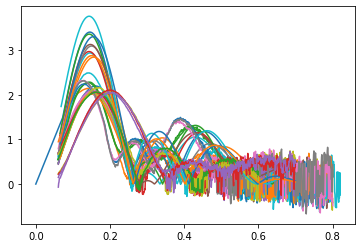

In [44]:
for i in range(0,36):
    if exp_FF.iloc[1,i][100] > 5.0:
        print(i)
        continue
    plt.plot(exp_FF.iloc[0,i],exp_FF.iloc[1,i])
    
plt.show()

In [45]:
smallest = 10000
biggest = 0
for i in range(0,36):
    if len(exp_FF.iloc[0,i]) < smallest:
        smallest = len(exp_FF.iloc[0,i])
    if len(exp_FF.iloc[0,i]) > biggest:
        biggest = len(exp_FF.iloc[0,i])

print(smallest, biggest)

617 849


In [56]:
exp_FF_list = []

for i in range(0,36):
    if len(exp_FF.iloc[1,i]) < 849:
        exp_FF_list.append(np.concatenate((exp_FF.iloc[1,i], np.zeros(849 - len(exp_FF.iloc[1,i])))))
        continue
    exp_FF_list.append(np.array(exp_FF.iloc[1,i]))
    
exp_FF_df = pd.DataFrame(exp_FF_list)
exp_FF_df = exp_FF_df.transpose()

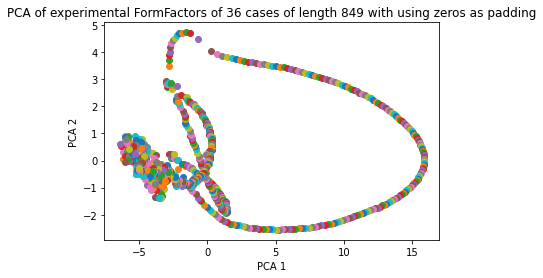

In [77]:
pca = PCA(n_components=2)
components = pca.fit_transform(exp_FF_df)

for values in components:
    plt.scatter(values[0],values[1])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of experimental FormFactors of 36 cases of length 849 with using zeros as padding')
plt.show()

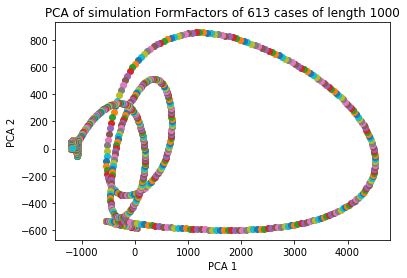

In [78]:
pca = PCA(n_components=2)
components = pca.fit_transform(sim_FF_df.transpose())

for values in components:
    plt.scatter(values[0],values[1])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of simulation FormFactors of 613 cases of length 1000')
plt.show()

In [132]:
sim_TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-4.006749,-3.966481,-3.926212,-3.885943,-3.845674,-3.805405,-3.765136,-3.724868,-3.684599,-3.644330,...,3.644330,3.684599,3.724868,3.765136,3.805405,3.845674,3.885943,3.926212,3.966481,4.006749
1,-4.188136,-4.146044,-4.103952,-4.061860,-4.019768,-3.977677,-3.935585,-3.893493,-3.851401,-3.809309,...,3.809309,3.851401,3.893493,3.935585,3.977677,4.019768,4.061860,4.103952,4.146044,4.188136
2,-3.638160,-3.601596,-3.565031,-3.528467,-3.491902,-3.455338,-3.418773,-3.382209,-3.345645,-3.309080,...,3.309080,3.345645,3.382209,3.418773,3.455338,3.491902,3.528467,3.565031,3.601596,3.638160
3,-3.894873,-3.855728,-3.816584,-3.777440,-3.738295,-3.699151,-3.660006,-3.620862,-3.581717,-3.542573,...,3.542573,3.581717,3.620862,3.660006,3.699151,3.738295,3.777440,3.816584,3.855728,3.894873
4,-3.844019,-3.805385,-3.766752,-3.728119,-3.689485,-3.650852,-3.612219,-3.573585,-3.534952,-3.496318,...,3.496318,3.534952,3.573585,3.612219,3.650852,3.689485,3.728119,3.766752,3.805385,3.844019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,-4.426408,-4.381922,-4.337435,-4.292949,-4.248462,-4.203976,-4.159489,-4.115003,-4.070516,-4.026030,...,4.026030,4.070516,4.115003,4.159489,4.203976,4.248462,4.292949,4.337435,4.381922,4.426408
609,-3.773735,-3.735808,-3.697881,-3.659954,-3.622027,-3.584100,-3.546173,-3.508246,-3.470319,-3.432392,...,3.432392,3.470319,3.508246,3.546173,3.584100,3.622027,3.659954,3.697881,3.735808,3.773735
610,-4.070915,-4.030001,-3.989087,-3.948174,-3.907260,-3.866346,-3.825433,-3.784519,-3.743605,-3.702691,...,3.702691,3.743605,3.784519,3.825433,3.866346,3.907260,3.948174,3.989087,4.030001,4.070915
611,-4.221646,-4.179217,-4.136789,-4.094360,-4.051931,-4.009503,-3.967074,-3.924646,-3.882217,-3.839788,...,3.839788,3.882217,3.924646,3.967074,4.009503,4.051931,4.094360,4.136789,4.179217,4.221646


In [181]:
def reduced_FF_to_TD_preprocessing(exp_FF_df, sim_FF_df, sim_TD_x_df, sim_TD_y_df):
    pca = PCA(n_components=2)
    exp_FF_pca_components = pca.fit_transform(exp_FF_df.transpose())
    
    pca = PCA(n_components=2)
    sim_FF_pca_components = pca.fit_transform(sim_FF_df.transpose())
    
    random.seed(42)
    train = random.sample(list(sim_FF_df.transpose().columns),int(round(613*0.8,0)))
    test = []
    for number in list(sim_FF_df.transpose().columns):
        if not number in train:
            test.append(number)
            
    sim_TD_x_df = sim_TD_x_df.transpose()
    TD_x_scaled_values = []
    for column in sim_TD_x_df.columns:
        TD_x_scaled_values.append((sim_TD_x_df[column] - sim_TD_x_df[column].mean()) / sim_TD_x_df[column].std())
        
    TD_x_scaled_df = pd.DataFrame(TD_x_scaled_values)
    
    TD_x_scaled_df = TD_x_scaled_df.transpose()
    TD_x_scaled_df.columns = sim_TD_x_df.columns
    
    sim_TD_y_df = sim_TD_y_df.transpose()
    TD_y_scaled_values = []
    for column in sim_TD_y_df.columns:
        TD_y_scaled_values.append((sim_TD_y_df[column] - sim_TD_y_df[column].mean()) / sim_TD_y_df[column].std())
    
    TD_y_scaled_df = pd.DataFrame(TD_y_scaled_values)
    TD_y_scaled_df = TD_y_scaled_df.transpose()
    TD_y_scaled_df.columns = sim_TD_y_df.columns
    
    zeroing = round((TD_y_scaled_df.iloc[0]+TD_y_scaled_df.iloc[-1])/2,3)
    TD_y_scaled_df = TD_y_scaled_df.subtract(zeroing)
             
    sim_TD_df = pd.concat([TD_x_scaled_df, TD_y_scaled_df], axis=0)
    train_input = sim_FF_pca_components[train].astype(np.float32)
    train_output = sim_TD_df[train].transpose().values.astype(np.float32)
    test_input = sim_FF_pca_components[test].astype(np.float32)
    test_output = sim_TD_df[test].transpose().values.astype(np.float32)
            
    print(train_input.shape)
    print(train_output.shape)
    print(test_input.shape)
    print(test_output.shape)
    print(exp_FF_pca_components.shape)
     
    return train_input, train_output, test_input, test_output, exp_FF_pca_components 
train_input, train_output, test_input, test_output, exp_input = reduced_FF_to_TD_preprocessing(exp_FF_df, sim_FF_df, sim_TD_x_df, sim_TD_y_df)

(490, 2)
(490, 400)
(123, 2)
(123, 400)
(36, 2)


In [177]:
def single_average_loss(actual,prediction):
    length = int(actual.shape[0]/2)
    
    t_x = actual[0:length]
    t_y = actual[length:]
    p_x = prediction[0:length]
    p_y = prediction[length:]
    
    distance_sum = 0
    for i in range(0,length):
        distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)

    return (distance_sum/length)

def metrics(actual,prediction):
    amount = int(actual.shape[0])
    length = int(actual.shape[1]/2)
    
    index = 0
    loss_list = []
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            
        loss_list.append(distance_sum/length)
        index = index + 1
     
    average_loss = sum(loss_list)/amount
    mode_loss = Counter(np.round(loss_list,5)).most_common(10)
    median_loss = st.median(np.round(loss_list,5))
    
    plt.hist(np.round(loss_list,5), bins = amount)
    plt.xlabel('Loss')
    plt.ylabel('Amount')
    plt.title('Loss frequency for test data of ' + str(amount))
    plt.show()
    
    return [average_loss, mode_loss, median_loss]

def simulation_plots(actual,prediction):
    random.seed(42)
    train = random.sample(range(0,len(actual)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = actual[number][0:length]
        y_2 = actual[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = actual[index][0:length].tolist()
        t_y = actual[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()
    
    length = int(len(prediction[0])/2)
    x_1 = prediction[train[0]][0:length]
    y_1 = prediction[train[0]][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[train[0]][0:length]
    y_2 = actual[train[0]][length:]
    
    plt.plot(x_2,y_2,c='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Curve of index ' + str(train[0]) + ' with predictions |blue| against actual |red|')
    plt.show() 
    print('The loss of the curve ' + str(single_average_loss(actual[train[0]],prediction[train[0]])))
    
    length = int(len(prediction[0])/2)
    x_1 = prediction[train[4]][0:length]
    y_1 = prediction[train[4]][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[train[4]][0:length]
    y_2 = actual[train[4]][length:]
    
    plt.plot(x_2,y_2,c='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Curve of index ' + str(train[4]) + ' with predictions |blue| against actual |red|')
    plt.show() 
    print('The loss of the curve ' + str(single_average_loss(actual[train[4]],prediction[train[4]])))
    
    length = int(len(prediction[0])/2)
    x_1 = prediction[train[9]][0:length]
    y_1 = prediction[train[9]][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[train[9]][0:length]
    y_2 = actual[train[9]][length:]
    
    plt.plot(x_2,y_2,c='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Curve of index ' + str(train[9]) + ' with predictions |blue| against actual |red|')
    plt.show() 
    print('The loss of the curve ' + str(single_average_loss(actual[train[9]],prediction[train[9]])))
    
def experiment_predictions(prediction):
    random.seed(42)
    train = random.sample(range(0,len(prediction)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x = prediction[number][0:length]
        y = prediction[number][length:]
        plt.plot(x,y,c='b')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random experiment predictions')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b')
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction on experiment data')
    plt.show()

Used time: 21.174498319625854 seconds


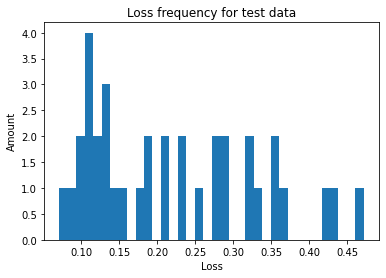

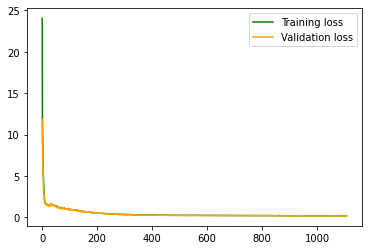

Loss average is: 0.2206155136380757
Loss mode is: [(0.12678, 1), (0.42444, 1), (0.13544, 1), (0.35938, 1), (0.12732, 1), (0.21157, 1), (0.15105, 1), (0.11958, 1), (0.18423, 1), (0.32239, 1)]
Loss median is: 0.19764


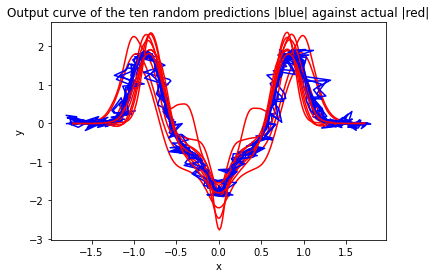

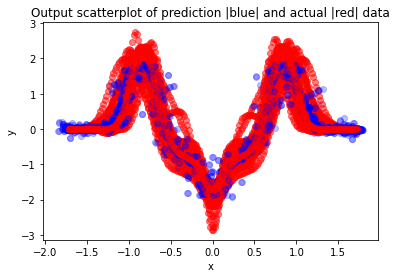

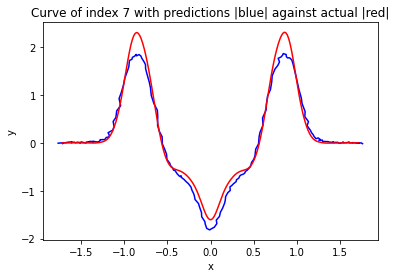

The loss of the curve 0.11958137771682856


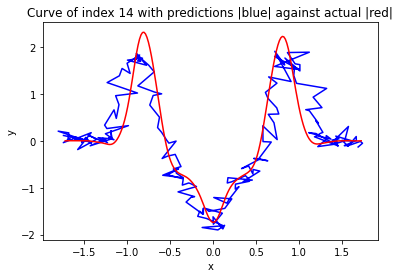

The loss of the curve 0.2779332798051362


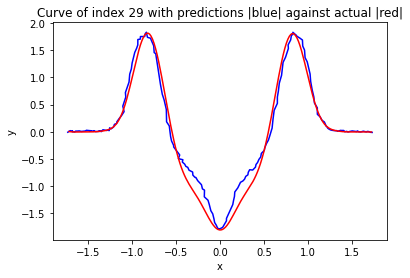

The loss of the curve 0.11486003140541565


In [158]:
general_start_time = time.time()

callbacks = [EarlyStopping(monitor='val_loss', 
                       mode='min', 
                       patience=100, 
                       restore_best_weights=True)]

Adam = tf.keras.optimizers.Adam(amsgrad=True)

inputs = keras.Input(shape=(2,))
x = layers.Dense(1000, activation='relu')(inputs)
#x = layers.Dense(1000, activation='relu')(inputs)
outputs = layers.Dense(400, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam, loss='mean_absolute_error')

history = model.fit(train_input, train_output, batch_size=128, epochs=1500, validation_split=0.2, callbacks=callbacks, verbose=0)

general_end_time = time.time()

print('Used time: ' + str(general_end_time - general_start_time) + ' seconds')

results = metrics(test_output, model.predict(test_input))

plt.plot(history.history['loss'], color = 'green', label = 'Training loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'Validation loss')
plt.legend()
plt.show()

print('Loss average is: ' + str(results[0]))
print('Loss mode is: ' + str(results[1]))
print('Loss median is: ' + str(results[2]))
simulation_plots(test_output,model.predict(test_input))
experiment_predictions(model.predict(exp_input))

Trial 90 Complete [00h 00m 04s]
loss: 0.22880496084690094

Best loss So Far: 0.14623618125915527
Total elapsed time: 00h 05m 11s
INFO:tensorflow:Oracle triggered exit
{'num_layers': 3, 'dense_0_units': 2000, 'dropout_0': 0.2, 'learning_rate': 0.01, 'dense_1_units': 1500, 'dropout_1': 0.15000000000000002, 'dense_2_units': 1000, 'dropout_2': 0.25, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0067'}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              6000      
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              3001500   
___________________________________________________________

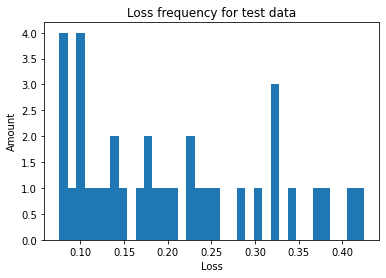

Loss average is: 0.20405373251246953
Loss mode is: [(0.09636, 1), (0.37254, 1), (0.17562, 1), (0.41002, 1), (0.17149, 1), (0.1439, 1), (0.08354, 1), (0.13953, 1), (0.22316, 1), (0.32325, 1)]
Loss median is: 0.183765


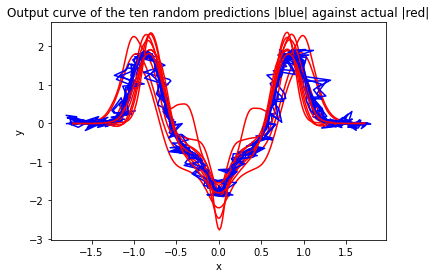

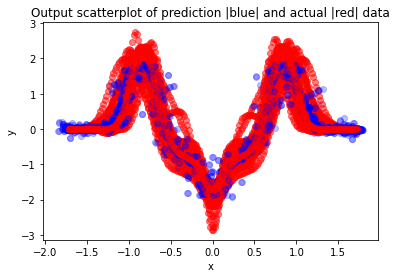

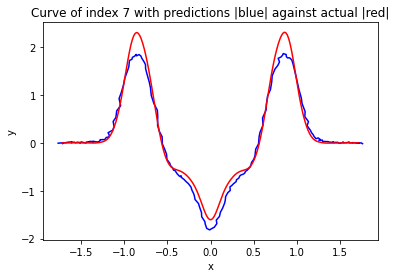

The loss of the curve 0.11958137771682856


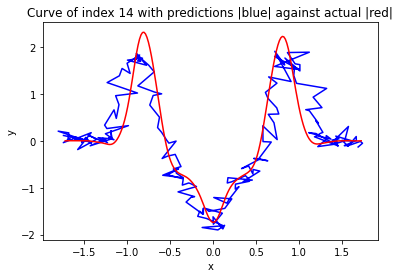

The loss of the curve 0.2779332798051362


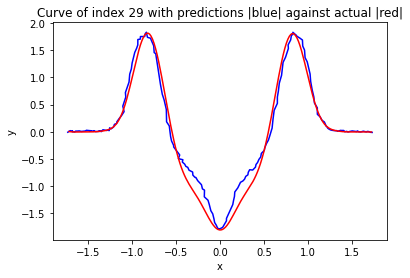

The loss of the curve 0.11486003140541565


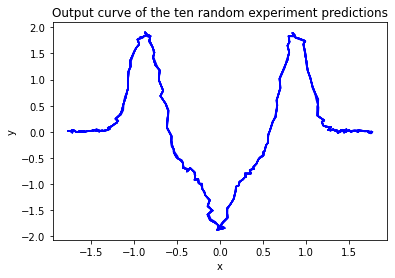

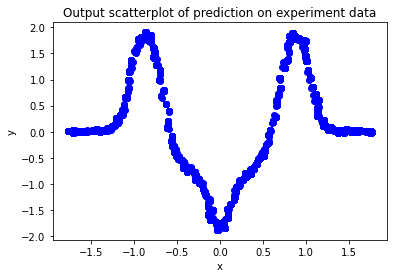

In [176]:
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = keras.Sequential()
    
    model.add(layers.Input(shape=(2,)))
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'dense_{i}_units', min_value=500, max_value=2000, step=500), 
                               activation='relu'))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.05, max_value=0.30, step=0.05), seed=42))
    
    model.add(layers.Dense(units=400, activation = 'linear'))
    
    model.compile(optimizer=Adam(amsgrad=True, learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),loss='mean_absolute_error')
    
    return model

tuner = Hyperband(
    build_model,
    objective='loss',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='FF_to_TD_9')

tuner.search(train_input, train_output,
             epochs=50,
             validation_data=(test_input, test_output))

best_model = tuner.get_best_models(num_models=1)[0]

best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

two_best_models = tuner.get_best_models(num_models=1)
print(two_best_models[0].summary())

results = metrics(test_output, best_model.predict(test_input))
print('Loss average is: ' + str(results[0]))
print('Loss mode is: ' + str(results[1]))
print('Loss median is: ' + str(results[2]))
simulation_plots(test_output,model.predict(test_input))
experiment_predictions(model.predict(exp_input))

Used time: 27.87022566795349 seconds


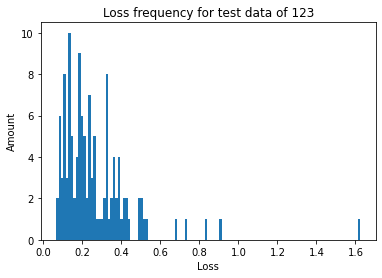

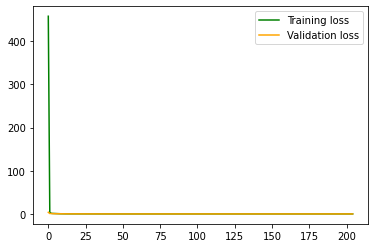

Loss average is: 0.26416770374235377
Loss mode is: [(0.20861, 1), (0.49244, 1), (0.42604, 1), (0.48878, 1), (0.41298, 1), (0.08717, 1), (0.18827, 1), (1.62562, 1), (0.23212, 1), (0.20606, 1)]
Loss median is: 0.21251


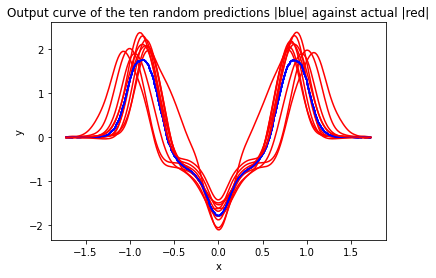

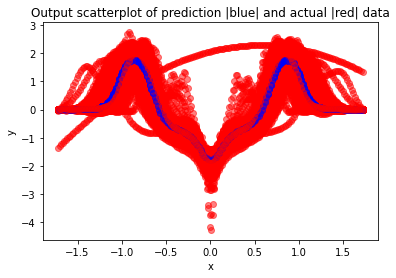

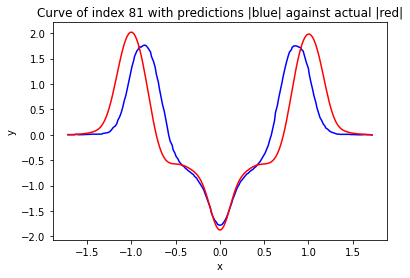

The loss of the curve 0.36704689007861935


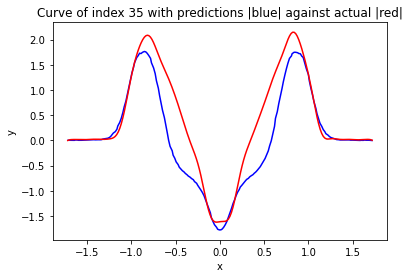

The loss of the curve 0.3242968283090124


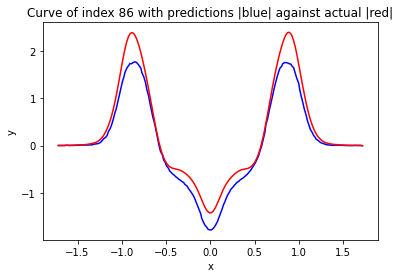

The loss of the curve 0.1917507746287544


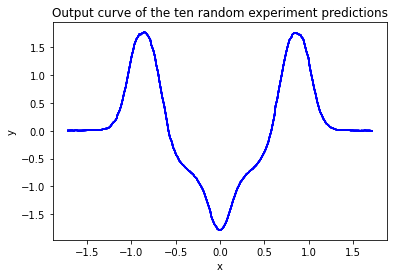

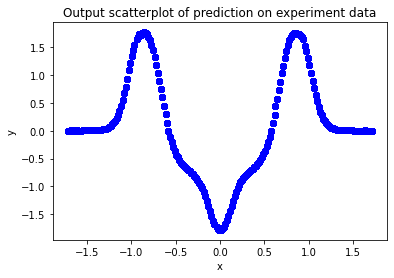

In [182]:
general_start_time = time.time()

callbacks = [EarlyStopping(monitor='val_loss', 
                       mode='min', 
                       patience=100, 
                       restore_best_weights=True)]

inputs = keras.Input(shape=(2,))
x = layers.Dense(2000, activation='relu')(inputs)
x = layers.Dropout(0.2, seed = 42)(x)
x = layers.Dense(1500, activation='relu')(x)
x = layers.Dropout(0.15, seed = 42)(x)
x = layers.Dense(1500, activation='relu')(x)
x = layers.Dropout(0.25, seed = 42)(x)
outputs = layers.Dense(400, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(amsgrad=True, learning_rate=1e-2), loss='mean_absolute_error')

history = model.fit(train_input, train_output, batch_size=128, epochs=1500, validation_split=0.2, callbacks=callbacks, verbose=0)

general_end_time = time.time()

print('Used time: ' + str(general_end_time - general_start_time) + ' seconds')

results = metrics(test_output, model.predict(test_input))

plt.plot(history.history['loss'], color = 'green', label = 'Training loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'Validation loss')
plt.legend()
plt.show()

print('Loss average is: ' + str(results[0]))
print('Loss mode is: ' + str(results[1]))
print('Loss median is: ' + str(results[2]))
simulation_plots(test_output,model.predict(test_input))
experiment_predictions(model.predict(exp_input))

Used time: 50.90793323516846 seconds


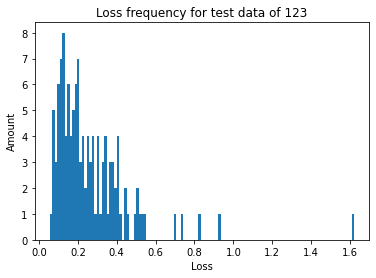

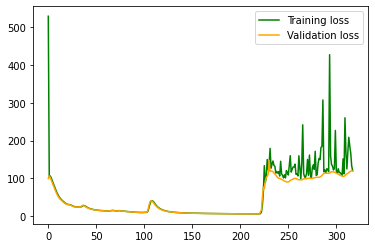

Loss average is: 0.26331966522856226
Loss mode is: [(0.22075, 1), (0.50975, 1), (0.442, 1), (0.50602, 1), (0.41118, 1), (0.07386, 1), (0.1774, 1), (1.6218, 1), (0.21845, 1), (0.21441, 1)]
Loss median is: 0.20832


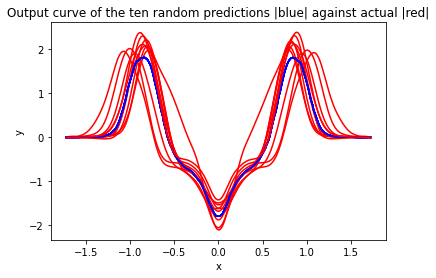

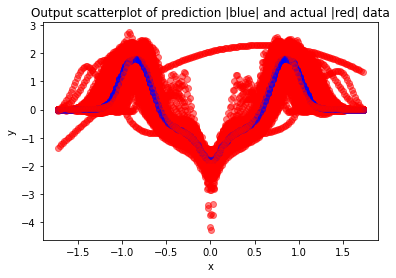

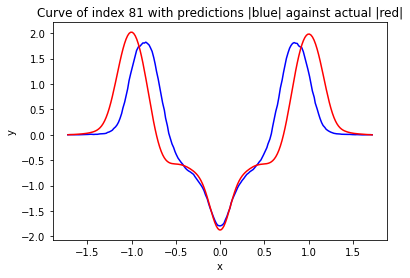

The loss of the curve 0.38310626418749666


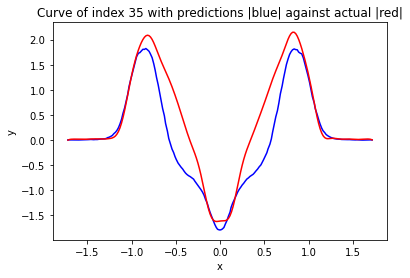

The loss of the curve 0.31020970914953744


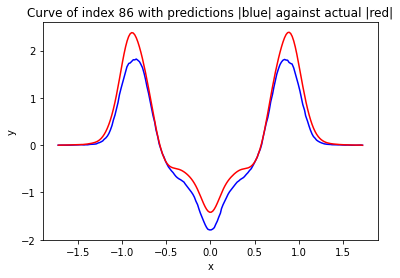

The loss of the curve 0.18335440954015467


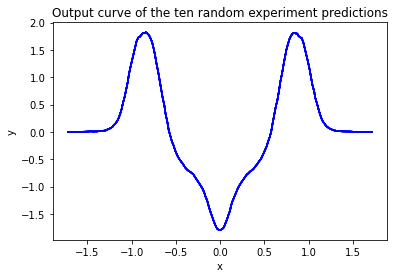

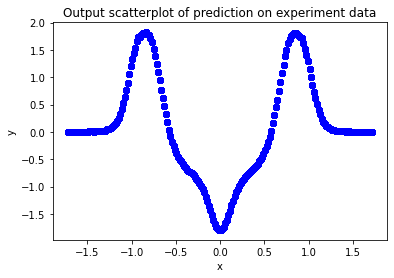

In [185]:
from keras import regularizers

general_start_time = time.time()

callbacks = [EarlyStopping(monitor='val_loss', 
                       mode='min', 
                       patience=100, 
                       restore_best_weights=True)]

inputs = keras.Input(shape=(2,))
x = layers.Dense(2000, activation='relu',kernel_regularizer=regularizers.l1(0.001))(inputs)
x = layers.Dropout(0.2, seed = 42)(x)
x = layers.Dense(1500, activation='relu',kernel_regularizer=regularizers.l1(0.001))(x)
x = layers.Dropout(0.15, seed = 42)(x)
x = layers.Dense(1500, activation='relu',kernel_regularizer=regularizers.l1(0.001))(x)
x = layers.Dropout(0.25, seed = 42)(x)
outputs = layers.Dense(400, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(amsgrad=True, learning_rate=1e-2), loss='mean_absolute_error')

history = model.fit(train_input, train_output, batch_size=128, epochs=1500, validation_split=0.2, callbacks=callbacks, verbose=0)

general_end_time = time.time()

print('Used time: ' + str(general_end_time - general_start_time) + ' seconds')

results = metrics(test_output, model.predict(test_input))

plt.plot(history.history['loss'], color = 'green', label = 'Training loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'Validation loss')
plt.legend()
plt.show()

print('Loss average is: ' + str(results[0]))
print('Loss mode is: ' + str(results[1]))
print('Loss median is: ' + str(results[2]))
simulation_plots(test_output,model.predict(test_input))
experiment_predictions(model.predict(exp_input))

Used time: 234.85588884353638 seconds


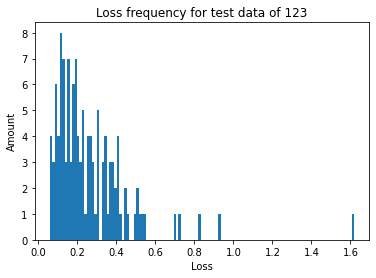

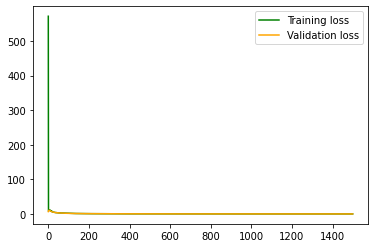

Loss average is: 0.263061508394999
Loss mode is: [(0.22265, 1), (0.50969, 1), (0.44363, 1), (0.5067, 1), (0.40975, 1), (0.06923, 1), (0.17663, 1), (1.61914, 1), (0.2201, 1), (0.21336, 1)]
Loss median is: 0.20658


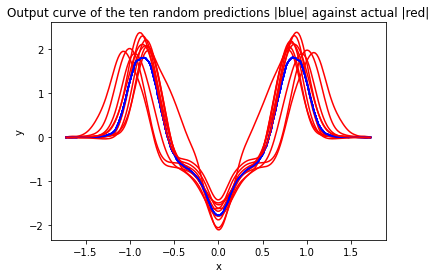

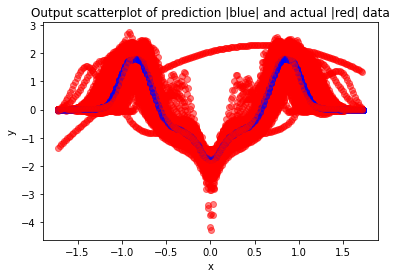

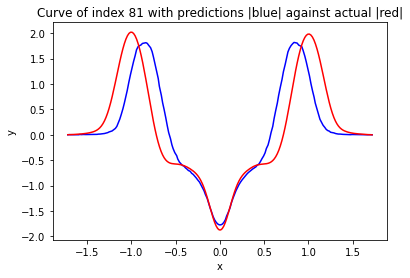

The loss of the curve 0.383341214487103


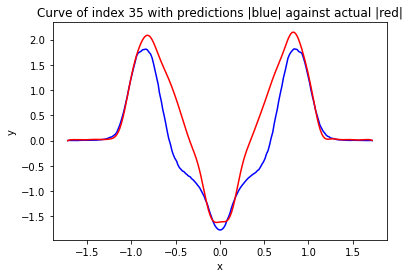

The loss of the curve 0.3070719047183653


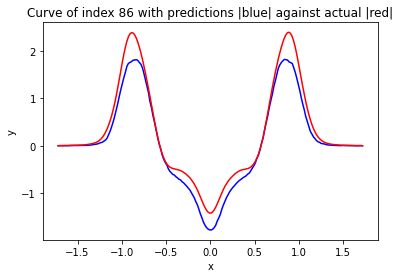

The loss of the curve 0.18232881665053924


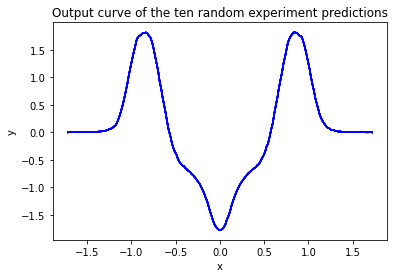

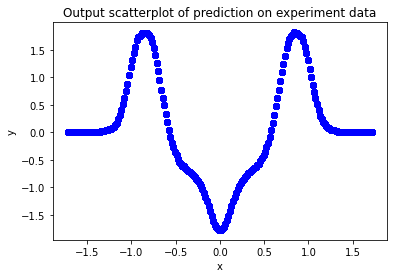

In [186]:
general_start_time = time.time()

callbacks = [EarlyStopping(monitor='val_loss', 
                       mode='min', 
                       patience=100, 
                       restore_best_weights=True)]

inputs = keras.Input(shape=(2,))
x = layers.Dense(2000, activation='relu',kernel_regularizer=regularizers.l2(0.001))(inputs)
x = layers.Dropout(0.2, seed = 42)(x)
x = layers.Dense(1500, activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.15, seed = 42)(x)
x = layers.Dense(1500, activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.25, seed = 42)(x)
outputs = layers.Dense(400, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(amsgrad=True, learning_rate=1e-2), loss='mean_absolute_error')

history = model.fit(train_input, train_output, batch_size=128, epochs=1500, validation_split=0.2, callbacks=callbacks, verbose=0)

general_end_time = time.time()

print('Used time: ' + str(general_end_time - general_start_time) + ' seconds')

results = metrics(test_output, model.predict(test_input))

plt.plot(history.history['loss'], color = 'green', label = 'Training loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'Validation loss')
plt.legend()
plt.show()

print('Loss average is: ' + str(results[0]))
print('Loss mode is: ' + str(results[1]))
print('Loss median is: ' + str(results[2]))
simulation_plots(test_output,model.predict(test_input))
experiment_predictions(model.predict(exp_input))